#**Senior Project**

#step1: Loading our dataset



#Loading data




#*   This dataset is the "Car_donation data" start around 1980 to 2023.....

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip freeze > requirements.txt

In [3]:
#Importing the require library
import os
import numpy as np
import pandas as pd
import os
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from scipy.stats import boxcox
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


In [4]:
# step 1: getting the datasets
#from google.colab import files
#uploaded=files.upload()

# then we are using pandas to read the csv
#import pandas as pd
car_donation=pd.read_csv('/content/drive/MyDrive/datas/_Car_Donation_Version7 - Raw Detail (1).csv')
# we are checking the head of the car donation, checking the first 10 rows
car_donation.head(10)

,operation,id,status,Sold_Year,Sold_month,Sold_Yearmonth,Donation_date,time,name,car_year,...,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time
0,SF,1.0,11.0,2021.0,1.0,2021-01,2020/08/07,NaN,Chung Pei Chen,2011.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
1,SF,2.0,11.0,2020.0,11.0,2020-11,2020/10/31,4:00 PM,CHENH CARSON,2003.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
2,SF,3.0,11.0,2020.0,11.0,2020-11,2020/10/31,3:00 PM,Fuchun Wang,2001.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
3,SF,4.0,11.0,2020.0,11.0,2020-11,2020/11/01,11:30 PM,CHEN LEI,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
4,SF,5.0,11.0,2020.0,11.0,2020-11,2020/11/01,4:00 PM,MINGLANG HU,1999.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
5,SF,6.0,11.0,2020.0,11.0,2020-11,2020/11/01,1:30 PM,LI CHUAN,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
6,SF,7.0,11.0,2020.0,12.0,2020-12,2020/11/02,NaN,Shing Hing Inc,1998.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
7,SF,8.0,11.0,2020.0,11.0,2020-11,2020/11/03,11:00 PM,Fan Yong Fa,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
8,SF,9.0,11.0,2020.0,11.0,2020-11,2020/11/04,2~3pm,Sim Hubert Y,2004.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
9,SF,10.0,11.0,2020.0,11.0,2020-11,2020/11/03,1:30 PM,Hing Yungwi,2013.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56


Check Data at first sight

In [5]:
# then we wish to have a detail summary of the datasets
car_donation.describe()

,id,status,Sold_Year,Sold_month,car_year,cost,Direct cost,cost type,Cost subtype,complain,plateNew,categoryColor,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,dmvMarketValue,buyItNowPrice,specialPrice
count,1196.000000,1196.000000,1098.000000,1098.000000,1188.000000,121.000000,0.0,0.0,0.0,0.0,0.0,1196.000000,0.0,1196.000000,1196.0,0.0,4.00000,0.0,0.0
mean,541.401338,10.366221,2021.234062,6.310565,2001.547138,58.495868,NaN,NaN,NaN,NaN,NaN,0.047659,NaN,0.015886,0.0,NaN,2400.00000,NaN,NaN
std,329.939768,2.244024,0.604485,3.494637,5.052576,93.473002,NaN,NaN,NaN,NaN,NaN,0.368513,NaN,0.125088,0.0,NaN,864.09876,NaN,NaN
min,1.000000,1.000000,2018.000000,1.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1600.00000,NaN,NaN
25%,264.750000,11.000000,2021.000000,3.000000,1999.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1900.00000,NaN,NaN
50%,521.500000,11.000000,2021.000000,6.000000,2002.000000,35.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2200.00000,NaN,NaN
75%,824.250000,11.000000,2022.000000,9.000000,2005.000000,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2700.00000,NaN,NaN
max,1123.000000,12.000000,2022.000000,12.000000,2016.000000,710.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,1.000000,0.0,NaN,3600.00000,NaN,NaN


In [6]:
# the columns's dtypes
car_donation.dtypes

operation             object
id                   float64
status               float64
Sold_Year            float64
Sold_month           float64
                      ...   
dmvMarketValue       float64
useTax                object
buyItNowPrice        float64
specialPrice         float64
data_refresh_time     object
Length: 72, dtype: object

In [7]:
car_donation['price']=car_donation['price'].str.replace(',','')
car_donation.price=car_donation.price.astype(float)
car_donation['mileage']=car_donation['mileage'].str.replace(',','')
car_donation['mileage'] = pd.to_numeric(car_donation['mileage'],errors='coerce')

# Main Focus:  Which region has the most buyers of the cars?

In [8]:
car_donation['zipcode'] = car_donation['address'].str.extract(r'(\d{5})')

In [9]:
!pip install uszipcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6942 sha256=7d553ec5250a526452384d7bf714997cd4379c477b7b69d7ee523e773dd09bc0
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.23
    Uninstalling SQLAlchemy-2.0.23:
      Successfully uninstalled SQLAlchemy-2.0.23
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 

In [10]:
!pip install geopandas

In [11]:
car_donation.columns

Index(['operation', 'id', 'status', 'Sold_Year', 'Sold_month',
       'Sold_Yearmonth', 'Donation_date', 'time', 'name', 'car_year', 'make',
       'model', 'mileage', 'plate', 'vin', 'phone', 'address', 'addr', 'email',
       'infofrom', 'remarks', 'whopickup', 'cleanorsalvage',
       'carfaxinfoowners', 'registrationfee', 'cost', 'workhours', 'whorepair',
       'fixrecord', 'onlinedate', 'firstprice', 'dateofsale', 'price',
       'Direct cost', 'cost type', 'Cost subtype', 'buyer', 'addrofbuyer',
       'whosale', 'who1098', 'leavemessage', 'todolist', 'whotodo',
       'salemileage', 'postdateofbill', 'donorinfo', 'complain', 'ticketNo',
       'ticketdeadline', 'ticketSender', 'ticketAddress', 'stockworklog',
       'areacode', 'isreferral', 'referrer', 'referralfee', 'buyerphone',
       'buyerID', 'buyerEmail', 'plateNew', 'inventoryDate', 'categoryColor',
       'mechanicalIssues', 'retailWholesaleJunk', 'newPlateFromDealer',
       'vinAudit', 'kbb', 'dmvMarketValue', 'useT

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


<ipython-input-12-7e3a49acf45d>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_data.loc[:, 'latitude'] = geo_df['latitude']
<ipython-input-12-7e3a49acf45d>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_data.loc[:, 'longitude'] = geo_df['longitude']


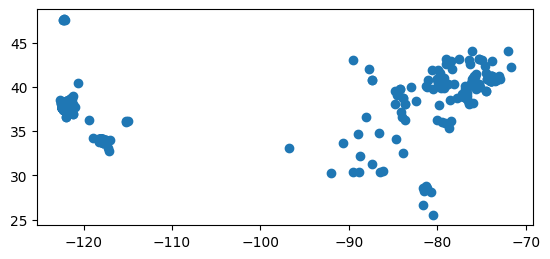

In [12]:
#Importing library
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from uszipcode import SearchEngine
from shapely.geometry import Point
# first, we need to convert zipcode column into string datatype
car_donation['zip_code']=car_donation['zipcode'].astype(str)
# next we need to create an new dataframe zipcode_data
zipcode_data=car_donation[['zip_code','Sold_Year','price','make']]
# then we need to Use SearchEngine from uszipcode to get additional zip code information, such as city and state, for each zip code in zipcode_data.

# next I need to create a function to getting the latitude and longitude
def get_lat_lon(zip_code):
  # we are intilziaed the SearchEngine object
  search=SearchEngine()
  result=search.by_zipcode(zip_code)
  if result is None:
    return None,None
  # we are returning the latitude and longitude
  return result.lat,result.lng
# then,we are creating geo_df
geo_df=zipcode_data.apply(lambda x: pd.Series(get_lat_lon(x['zip_code'])),axis=1)
# we are setting the columns
geo_df.columns=['latitude','longitude']
# creating a new columns called geometry
#geo_df['geometry']=geo_df.apply(lambda row: Point(row.longitude,row.latitude),axis=1)
# next we are making new columns city and state
# for x in zipcode_data:
#   result=search.by_zipcode(x)
#   if result:
#     zipcode_data['city']=result.major_city
#     zipcode_data['state']=result.state
#   else:
#     zipcode_data['city']=None
#     zipcode_data['state']=None
# next, we need to merge the dataframe
#merged_df=pd.merge(zipcode_data,geo_df,on='zip_code')
# then, we need to create an new column in merged dataframe with geometry field____
# create the latitude and longitude columns
zipcode_data.loc[:, 'latitude'] = geo_df['latitude']
zipcode_data.loc[:, 'longitude'] = geo_df['longitude']
geo_zip_data=gpd.GeoDataFrame(zipcode_data,geometry=gpd.points_from_xy(zipcode_data.longitude,zipcode_data.latitude))
# then we need to Plot map using matplotlib libraty
geo_zip_data.plot()
#showing the plot
plt.show()
# we need to load the zipcode columns in our dataset and convert it into geopandas
#geo_zip_data=gpd.GeoDataFrame(car_donation['zipcode'],geometry=gpd.points_from_xy())

<ipython-input-13-8851ea2e3c0d>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


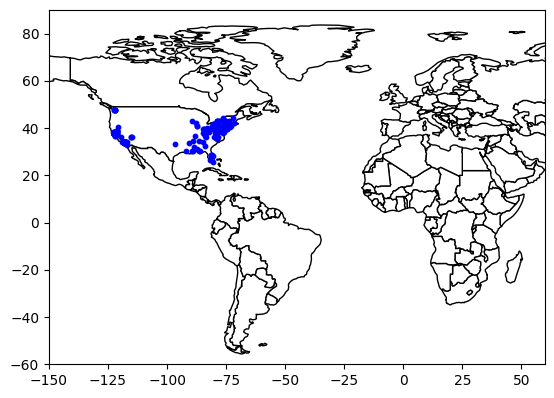

In [13]:
# Importing the require library
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Convert the dataframe to a GeoDataFrame with Point
geometry=gpd.points_from_xy(zipcode_data.longitude,zipcode_data.latitude)
# Setting up geo_points
geo_points=gpd.GeoDataFrame(zipcode_data,geometry=geometry)
# setting up the geo_points object
fig,ax=plt.subplots()
# Taking care of the world map
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#plotting the plot
world.plot(ax=ax,color='white',edgecolor='black')
geo_points.plot(ax=ax,markersize=10,color='blue',marker='o')

# setting the x and y limit
ax.set_xlim([-150,60])
ax.set_ylim([-60,90])
plt.show()

In [14]:
!pip install mplcursors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 968.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21166 sha256=b1fac0a3a6e405929741cfa0565dc573a203453be73b807cb674d7d60658c019
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


<ipython-input-15-8dcc62b26584>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


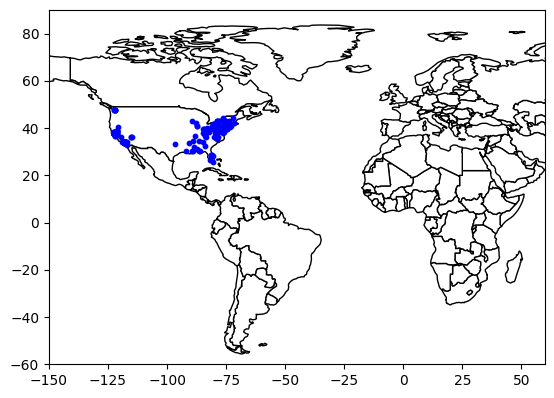

In [15]:
# Importing the require library
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import mplcursors
# Convert the dataframe to a GeoDataFrame with Point
geometry=gpd.points_from_xy(zipcode_data.longitude,zipcode_data.latitude)
# Setting up geo_points
geo_points=gpd.GeoDataFrame(zipcode_data,geometry=geometry)
# setting up the geo_points object
fig,ax=plt.subplots()
# Taking care of the world map
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#plotting the plot
world.plot(ax=ax,color='white',edgecolor='black')
geo_points.plot(ax=ax,markersize=10,color='blue',marker='o')

# setting the x and y limit
ax.set_xlim([-150,60])
ax.set_ylim([-60,90])

# help me add zoom-in functionality using mplcursors
mplcursors.cursor(hover=True)
plt.show()



# Before doing k nesrest neighbors, we need to determine the best number of k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

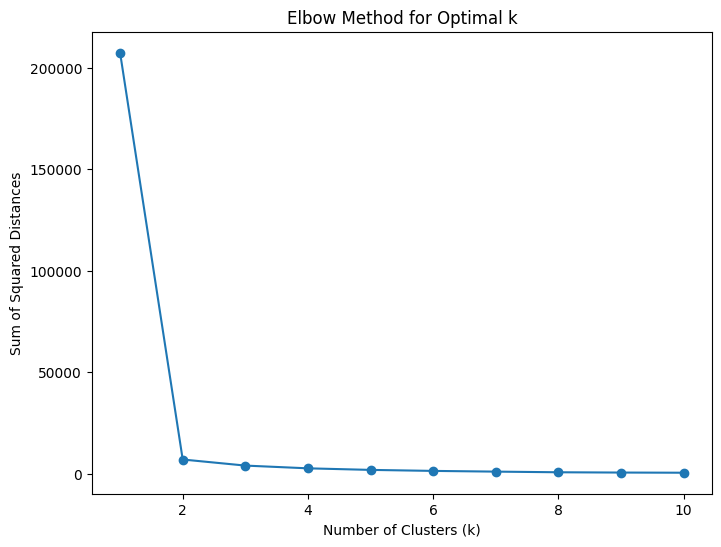

In [16]:
# import the require library
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import geopandas as gpd

# We are dropping na values
zipcode_data = zipcode_data.dropna()

# We are Extracting features for clustering
X = zipcode_data[['latitude', 'longitude']]

# We are Running k-means for a range of clusters
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k).fit(X)
  sse.append(kmeans.inertia_)

# We are Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-9799e8f48604>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


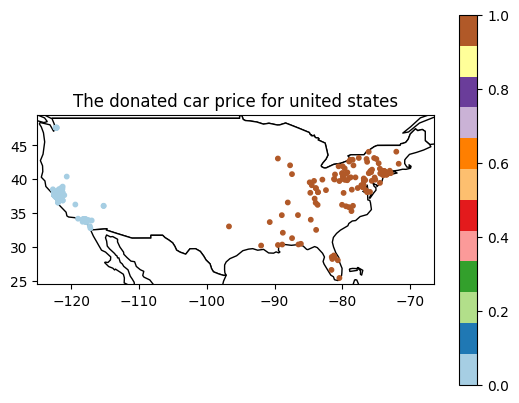

In [17]:
import pandas as pd
from sklearn.cluster import KMeans

# perform machine learning analysis on the zipcode_data dataframe
#zipcode_data = pd.read_csv('zipcode_data.csv')
zipcode_data = zipcode_data.dropna()
X = zipcode_data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=2).fit(X)
zipcode_data['label'] = kmeans.labels_

# Convert the dataframe to a GeoDataFrame with Point
geometry=gpd.points_from_xy(zipcode_data.longitude,zipcode_data.latitude)
# Setting up geo_points
geo_points=gpd.GeoDataFrame(zipcode_data,geometry=geometry)
# setting up the geo_points object
fig,ax=plt.subplots()
# Taking care of the world map
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#plotting the plot
world.plot(ax=ax,color='white',edgecolor='black')
geo_points.plot(ax=ax,markersize=10,cmap='Paired',column='label',legend=True)
# for idx, row in geo_points.iterrows():
#     ax.annotate(text=row['zip_code'], xy=(row['longitude'], row['latitude']), xytext=(3, 3), textcoords="offset points", fontsize=8, color='black')

# setting the x and y limit
ax.set_xlim([-125,-66.5])
ax.set_ylim([24.5, 49.5])
plt.title("The donated car price for united states")
plt.show()

# next, we wish to compare the median prices from the three clusters


In [18]:
median_car_price_by_label = zipcode_data.groupby('label')['price'].median()

# We are Merging the median values back into original DataFrame based on the label
zipcode_data = zipcode_data.merge(median_car_price_by_label, left_on='label', right_index=True, suffixes=('', '_median'), how='left')

# We are Rename the new column to median_car_price
zipcode_data.rename(columns={'car_price_median': 'median_car_price'}, inplace=True)

In [19]:
zipcode_data

,zip_code,Sold_Year,price,make,latitude,longitude,label,price_median
0,95035,2021.0,3300.0,Volk,37.44,-121.87,0,1400.0
1,94124,2020.0,1200.0,FORD,37.73,-122.38,0,1400.0
2,94040,2020.0,2200.0,Honda,37.38,-122.08,0,1400.0
4,95035,2020.0,100.0,Honda,37.44,-121.87,0,1400.0
6,94116,2020.0,700.0,Chev,37.74,-122.48,0,1400.0
...,...,...,...,...,...,...,...,...
1181,98033,2022.0,560.0,HOND,47.67,-122.18,0,1400.0
1184,34787,2022.0,555.0,Nissan,28.56,-81.58,1,1250.0
1185,20723,2022.0,500.0,BMW,39.14,-76.87,1,1250.0
1187,13424,2022.0,465.0,Acura,43.15,-75.33,1,1250.0


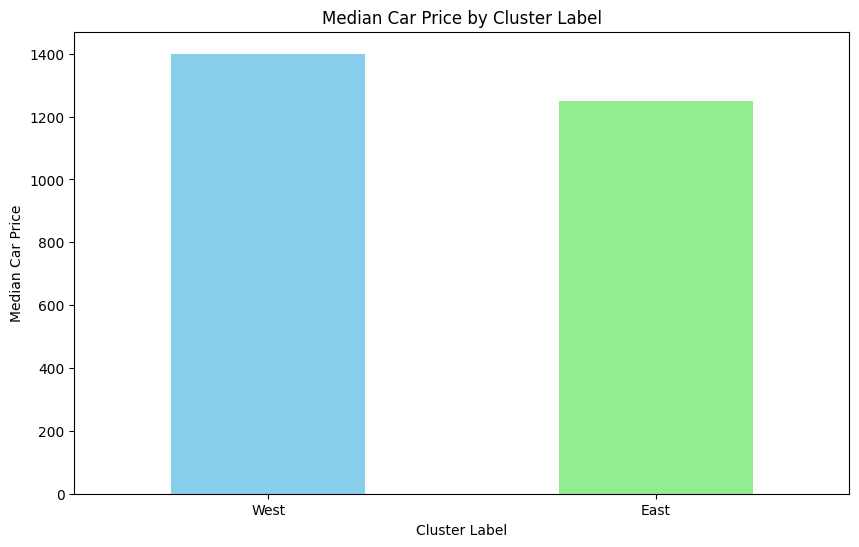

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'zipcode_data' has been updated with the median car price information

# Group by label and calculate median price
median_car_price_by_label = zipcode_data.groupby('label')['price'].median()

# Merge the median values back into the original DataFrame based on the label
zipcode_data = zipcode_data.merge(median_car_price_by_label, left_on='label', right_index=True, suffixes=('', '_median'), how='left')

# Rename the new column to median_car_price
zipcode_data.rename(columns={'price_median': 'median_car_price'}, inplace=True)

# We are Renaming the labels:
median_car_price_by_label.index = ['West', 'East']
colors = ['skyblue', 'lightgreen']
# Plotting the bar chart
plt.figure(figsize=(10, 6))
median_car_price_by_label.plot(kind='bar', color=colors)
plt.title('Median Car Price by Cluster Label')
plt.xlabel('Cluster Label')
plt.ylabel('Median Car Price')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()
